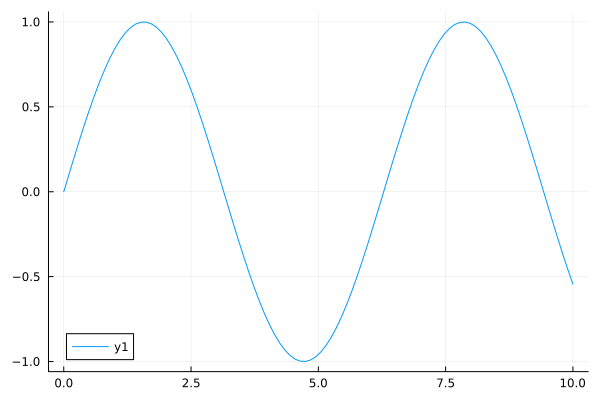

In [1]:
# funny sine graph
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

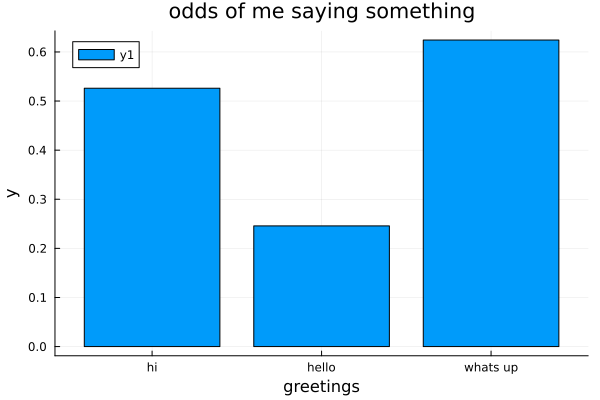

In [4]:
# funny bar graph
using Plots
x = ["hi", "hello", "whats up"]
y = rand(3)
p = bar(x, y)
ylabel!("y")
xlabel!("greetings")
title!("odds of me saying something")
display(p)
#savefig(p, "barplot.png")

In [1]:
# setup code
using Graphs: DiGraph
using StatsPlots
using Plots, GraphRecipes
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_cardinality_bounds (generic function with 1 method)

In [2]:
aids_data_file_path = "dataset/aids/aids.txt"
aids_data = load_dataset(aids_data_file_path)
datasets = [aids_data]
dataset_names = ["aids"]
build_time = []
summary_size = []
color_summaries = []
for dataset in datasets
    results = @timed generate_color_summary(dataset, 32, verbose=true)
    push!(build_time, results[2])
    push!(summary_size,  get_color_summary_size(results[1]))
    push!(color_summaries, results[1])
end

Started coloring


Finished coloring

UndefVarError: UndefVarError: i not defined

In [ ]:
include("Source/QuasiStableCardinalityEstimator.jl")

aids_query_directories = ["/queryset/aids/Chain_3/",
"/queryset/aids/Chain_6/",
"/queryset/aids/Chain_9/",
"/queryset/aids/Chain_12/",
"/queryset/aids/Cycle_3/",
"/queryset/aids/Cycle_6/",
"/queryset/aids/Flower_6/",
"/queryset/aids/Flower_9/",
"/queryset/aids/Flower_12/",
"/queryset/aids/Graph_3/",
"/queryset/aids/Graph_6/",
"/queryset/aids/Graph_9/",
"/queryset/aids/Graph_12/",
"/queryset/aids/Petal_6/",
"/queryset/aids/Petal_9/",
"/queryset/aids/Petal_12/",
"/queryset/aids/Star_3/",
"/queryset/aids/Star_6/",
"/queryset/aids/Star_9/",
"/queryset/aids/Tree_3/",
"/queryset/aids/Tree_6/",
"/queryset/aids/Tree_9/",
"/queryset/aids/Tree_12/"]
aids_query_paths = [readdir(pwd() * dir, join=true) for dir in aids_query_directories]
aids_query_paths = [(aids_query_paths...)...]
aids_exact_sizes = []
aids_bounds = []
aids_bounds_with_stats = []
aids_relative_errors = []
aids_relative_errors_with_stats = []
aids_query_types = []
println("Summary Size: ", summary_size[1])
println("Summary Build Time: ", build_time[1])
for query_path in aids_query_paths
    println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    query_type = match(r".*/queryset/aids/(.*)_.*/.*", query_path).captures[1]
    bound_results = @timed get_cardinality_bounds(query, color_summaries[1], usingStoredStats=false)
    bound_results_with_stats = @timed get_cardinality_bounds(query, color_summaries[1], usingStoredStats=true)
    gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
#    println("Bound Time: ", bound_results[2])
#    println("Exact Size: ", gcare_size)
#    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
#    println("Relative Error [Lower, Avg, Upper]: ", bound_results[1]./gcare_size)
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_with_stats[1][2] = max(1, bound_results_with_stats[1][2])
    push!(aids_exact_sizes, gcare_size)
    push!(aids_bounds, bound_results[1])
    push!(aids_bounds_with_stats, bound_results_with_stats[1])
    push!(aids_relative_errors, bound_results[1] ./ gcare_size)
    push!(aids_relative_errors_with_stats, bound_results_with_stats[1] ./ gcare_size)
    push!(aids_query_types, query_type)
end

In [4]:
# load human data
human_data_file_path = "dataset/human/human.txt"
human_data = load_dataset(human_data_file_path)
datasets = [human_data]
dataset_names = ["human"]

# generate color summary
build_time = []
summary_size = []
color_summaries = []
for dataset in datasets
    results = @timed generate_color_summary(dataset, 64, verbose=true)
    push!(build_time, results[2])
    push!(summary_size,  get_color_summary_size(results[1]))
    push!(color_summaries, results[1])
end

In [ ]:
# graph stats about cycle probability given direction (HUMAN)
path_probability_pairs = color_summaries[1].cycle_probabilities
paths = keys(path_probability_pairs)
println("Number of paths: ", length(paths))
current_probabilities::Vector{Float64} = []
path_types::Vector{String} = []
current_index = 0
for path in paths
    # [f, b, f, b, ..]
    current_path=""
    for direction in path
        current_path = current_path * ((direction) ? "f" : "b")
    end
    push!(path_types, current_path)
    push!(current_probabilities, path_probability_pairs[path])
    println(path_probability_pairs[path])
end
p = bar(path_types, current_probabilities)
xlabel!("Edge directions within path")
display(p)


making cycles


making paths


making cycles
making paths


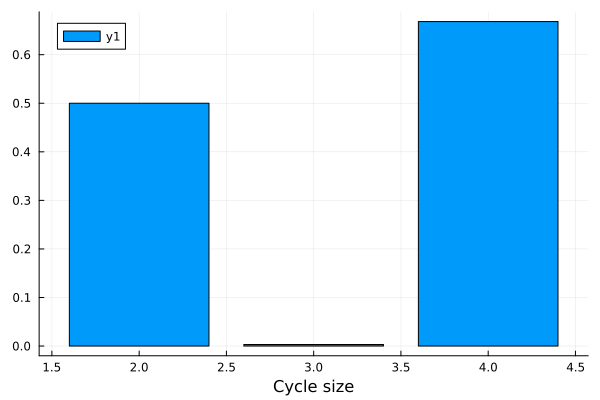

making cycles
making paths

In [4]:
# graph stats about cycle probability given distance
# steps:
# generate paths and cycles for each distance
# find the odds that those paths close
# graph (there should be only 3 bars)
likelihoods::Dict{Int, Float64} = Dict()
for i in 2:4
    likelihoods[i] = approximate_cycle_likelihood(i, aids_data)
end
cycle_sizes::Vector{Int} = []
cycle_likelihoods::Vector{Float64} = []
for size in keys(likelihoods)
    push!(cycle_sizes, size)
    push!(cycle_likelihoods, likelihoods[size])
end
p = bar(cycle_sizes, cycle_likelihoods)
xlabel!("Cycle size")
display(p)

In [2]:
# setup code
using Graphs: DiGraph
using StatsPlots
using Plots, GraphRecipes
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_exact_size (generic function with 1 method)

In [ ]:
g_property = DataGraph(4)
update_node_labels!(g_property, 1, [1])
update_node_labels!(g_property, 2, [1])
update_node_labels!(g_property, 3, [1])
update_node_labels!(g_property, 4, [1])
add_labeled_edge!(g_property, (1, 2), 1)
add_labeled_edge!(g_property, (2, 3), 1)
add_labeled_edge!(g_property, (2, 4), 1)
add_labeled_edge!(g_property, (3, 1), 1)
add_labeled_edge!(g_property, (4, 1), 1)
display_graph!(g_property)
likelihoods::Dict{Int, Float64} = Dict()
for i in 2:4
        likelihoods[i] = approximate_cycle_likelihood(i, g_property)
end
cycle_sizes::Vector{Int} = []
cycle_likelihoods::Vector{Float64} = []
for size in keys(likelihoods)
        push!(cycle_sizes, size)
        push!(cycle_likelihoods, likelihoods[size])
end
p = bar(cycle_sizes, cycle_likelihoods)
xlabel!("Cycle size")
display(p)

In [ ]:
# graph stats about cycle probability given direction
path_probability_pairs = color_summaries[1].cycle_probabilities
paths = keys(path_probability_pairs)
println("Number of paths: ", length(paths))
current_probabilities::Vector{Float64} = []
path_types::Vector{String} = []
current_index = 0
for path in paths
    current_path=""
    for direction in path
        current_path = current_path * ((direction) ? "f" : "b")
    end
    push!(path_types, current_path)
    push!(current_probabilities, path_probability_pairs[path])
    println(path_probability_pairs[path])
end
p = bar(path_types, current_probabilities)
xlabel!("Edge directions within path")
display(p)


In [ ]:
# see if cycles have an effect on the results

# initialize the aids dataset

# generate the color summary

# only do a couple of the exact sizes with/without cycles

# do the queries with/without cycles

# compare the results for with/without cycles



In [1]:
using Graphs: DiGraph
using StatsPlots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")
include("Source/ExactSizeCalculator.jl")

get_exact_size (generic function with 1 method)

In [4]:
aids_data_file_path = "dataset/aids/aids.txt"
aids_data = load_dataset(aids_data_file_path)
datasets = Dict("aids"=>aids_data)
dataset_names = ["aids"]
nothing

In [5]:
build_time = Dict()
summary_size = Dict()
color_summaries = Dict()
for dataset in dataset_names
    results = @timed generate_color_summary(datasets[dataset], 32, verbose=true, max_size = 4, num_sample_nodes=1000)
    build_time[dataset] = results[2]
    summary_size[dataset] = get_color_summary_size(results[1])
    color_summaries[dataset] = results[1]
end

Started coloring


Finished coloring

Generating Cycles of Size: 2


Generating Cycles of Size: 3


Generating Cycles of Size: 4


Started bloom filters


Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


In [7]:
aids_query_directories = [
"/queryset/aids/Cycle_3/",
"/queryset/aids/Cycle_6/",
"/queryset/aids/Flower_6/",
"/queryset/aids/Flower_9/",
"/queryset/aids/Flower_12/",
"/queryset/aids/Graph_3/",
"/queryset/aids/Graph_6/",
"/queryset/aids/Graph_9/",
"/queryset/aids/Graph_12/",
"/queryset/aids/Petal_6/",
"/queryset/aids/Petal_9/",
"/queryset/aids/Petal_12/"]
aids_query_paths = [readdir(pwd() * dir, join=true) for dir in aids_query_directories]
aids_query_paths = [(aids_query_paths...)...]
aids_exact_sizes = []
aids_exact_sizes_without_cycles = []
aids_bounds = []
aids_bounds_without_cycles = []
aids_relative_errors = []
aids_relative_errors_without_cycles = []
aids_query_types = []
println("Summary Size: ", summary_size["aids"])
println("Summary Build Time: ", build_time["aids"])
num_completed = 0
for query_path in aids_query_paths
    if num_completed > 100
        break
    end
    num_completed += 1
    #println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    query_type = match(r".*/queryset/aids/(.*)_.*/.*", query_path).captures[1]
    bound_results = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=true, include_cycles = true)
    bound_results_without_cycles = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=true, include_cycles = false)
    exact_size = get_exact_size(query, aids_data)
    exact_size_without_cycles = get_exact_size(query, aids_data, include_cycles = false)
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_without_cycles[1][2] = max(1, bound_results_without_cycles[1][2])
    push!(aids_exact_sizes, exact_size)
    push!(aids_bounds, bound_results[1])
    push!(aids_exact_sizes_without_cycles, exact_size_without_cycles)
    push!(aids_bounds_without_cycles, bound_results_without_cycles[1])
    push!(aids_relative_errors, bound_results[1] ./ exact_size)
    push!(aids_relative_errors_without_cycles, bound_results_without_cycles[1] ./ exact_size_without_cycles)
    push!(aids_query_types, query_type)
end